In [32]:
import pandas as pd 
import os

In [33]:
os.chdir("C:/Users/FEZA/Downloads")
data = pd.read_csv("student_data.csv")

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

## Untuk 100 data dan 5 variabel X

In [35]:
# variabel independen
X= data[['Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 
                  'Age at enrollment', 'Curricular units 1st sem (evaluations)', 
                  'Curricular units 1st sem (credited)']].head(100)

# variabel dependen
Y = data['Curricular units 1st sem (grade)'].head(100)

# pembentukan model regresi
model= LinearRegression()
model.fit(X, Y)

print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)


Intercept:  2.3654581105394437
Coefficients:  [-0.18527236  1.66556004 -0.02194948  0.31779926 -0.43474713]


In [36]:
X

,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Age at enrollment,Curricular units 1st sem (evaluations),Curricular units 1st sem (credited)
0,0,0,20,0,0
1,6,6,19,6,0
2,6,0,19,0,0
3,6,6,20,8,0
4,6,5,45,9,0
...,...,...,...,...,...
95,5,5,19,9,0
96,6,6,18,6,0
97,7,7,18,7,0
98,5,5,19,7,0


In [37]:
Y

0      0.000000
1     14.000000
2      0.000000
3     13.428571
4     12.333333
        ...    
95    14.000000
96    13.666667
97    13.750000
98    14.200000
99    11.960000
Name: Curricular units 1st sem (grade), Length: 100, dtype: float64

Persamaan regresi

Y = 2.365 -0.185X1 + 1.666X2 -0.0219X3 + 0.3178X4 -0.4347X5

### R Square

In [38]:
# Calculating the new R-squared value
r_squared = model.score(X, Y)
r_squared

0.7693225865136758

## Untuk seluruh data dan 10 X

In [39]:
# variabel dependen
X_second_semester = data[['Age at enrollment', 'Previous qualification', 'Mother\'s qualification', 
                          'Father\'s qualification', 'Application order', 'Curricular units 1st sem (enrolled)', 
                          'Curricular units 1st sem (approved)', 'Curricular units 1st sem (evaluations)', 
                          'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (enrolled)']]

# variabel independen
Y_second_semester = data['Curricular units 2nd sem (grade)']

# pemodelan regresi
model_second_semester = LinearRegression()
model_second_semester.fit(X_second_semester, Y_second_semester)

print("Intercept: ", model_second_semester.intercept_)
print("Coefficients: ", model_second_semester.coef_)

# menghitung R-squared
r_squared_second_semester = model_second_semester.score(X_second_semester, Y_second_semester)
print(f"R Square : {r_squared_second_semester}")

Intercept:  6.790820650043545
Coefficients:  [-4.40215106e-02  9.54577214e-05  1.16054129e-02  2.87921356e-03
  4.78870726e-03 -1.81509314e+00  1.57485897e+00  1.45370501e-01
  2.13730443e-01  8.51117033e-01]
R Square : 0.5955167796503557


### Uji Simultan dan Parsial

In [40]:
import statsmodels.api as sm

# menambahkan konstanta ke dalam model
X_sm = sm.add_constant(X_second_semester)

# membangun model regresi
model_sm = sm.OLS(Y_second_semester, X_sm).fit()

# summary model
model_summary = model_sm.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Curricular units 2nd sem (grade)   R-squared:                       0.596
Model:                                          OLS   Adj. R-squared:                  0.595
Method:                               Least Squares   F-statistic:                     649.7
Date:                              Thu, 11 Jan 2024   Prob (F-statistic):               0.00
Time:                                      15:42:45   Log-Likelihood:                -11578.
No. Observations:                              4424   AIC:                         2.318e+04
Df Residuals:                                  4413   BIC:                         2.325e+04
Df Model:                                        10                                         
Covariance Type:                          nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      6.7908      0.241     28.130      0.000       6.318       7.264
Age at enrollment                         -0.0440      0.008     -5.823      0.000      -0.059      -0.029
Previous qualification                  9.546e-05      0.013      0.007      0.994      -0.026       0.026
Mother's qualification                     0.0116      0.007      1.743      0.081      -0.001       0.025
Father's qualification                     0.0029      0.005      0.542      0.588      -0.008       0.013
Application order                          0.0048      0.040      0.119      0.905      -0.074       0.084
Curricular units 1st sem (enrolled)       -1.8151      0.073    -24.760      0.000      -1.959      -1.671
Curricular units 1st sem (approved)        1.5749      0.027     59.146      0.000       1.523       1.627
Curricular units 1st sem (evaluations)     0.1454      0.022      6.568      0.000       0.102       0.189
Curricular units 2nd sem (evaluations)     0.2137      0.022      9.817      0.000       0.171       0.256
Curricular units 2nd sem (enrolled)        0.8511      0.073     11.729      0.000       0.709       0.993
==============================================================================
Omnibus:                      445.012   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              794.877
Skew:                          -0.689   Prob(JB):                    2.48e-173
Kurtosis:                       4.553   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Uji Simultan
Keputusan 
        Karena p-value<0.05, maka keputusannya adalah tolak H_0
Kesimpulan
        Dengan tingkat signifikansi 5% dan data yang digunakan, cukup bukti untuk menyatakan bahwa seluruh variabel bebas (X_1  hingga X_10) mempengaruhi secara signifikan terhadap variabel tidak bebas (Y).



Uji Parsial

Keputusan
	Untuk variabel X_2,X_3,X_4,X_5, karena p-value>0.05, maka keputusannya adalah gagal tolak H_0
	Untuk variabel X_1,X_6,X_7,X_8,X_9,X_10, karena p-value<0.05, maka keputusannya adalah tolak H_0
Kesimpulan
	Untuk variabel X_2,X_3,X_4,X_5, dengan tingkat signifikansi 5% dan data yang digunakan, belum cukup bukti untuk menyatakan bahwa variabel X_2,X_3,X_4,X_5 berpengaruh secara signifikan terhadap variabel tidak bebas (Y).
	Untuk variabel X_1,X_6,X_7,X_8,X_9,X_10, dengan tingkat signifikansi 5% dan data yang digunakan, cukup bukti untuk menyatakan bahwa variabel X_1,X_6,X_7,X_8,X_9,X_10 berpengaruh secara signfikan terhadpa variabel tidak bebas (Y).


### Normalitas Residual

In [41]:
from scipy.stats import kstest

residuals = model_sm.resid
# menghitung nilai KS
ks_statistic, ks_p_value = kstest(residuals, 'norm')

ks_statistic, ks_p_value

(0.2519356172020203, 6.013309474887329e-248)

### Normalitas Variabel Bebas

Shapiro-Wilk Test untuk variabel Age at enrollment: Statistics=0.7071640491485596, p-value=0.0


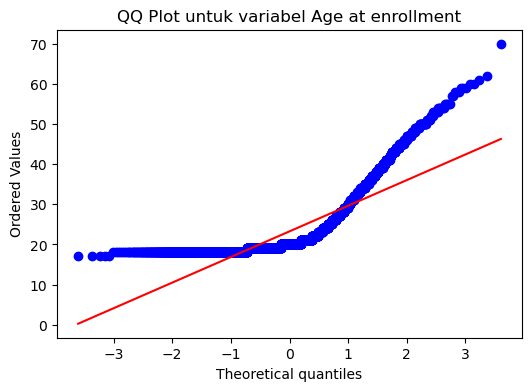

Shapiro-Wilk Test untuk variabel Previous qualification: Statistics=0.4253324270248413, p-value=0.0


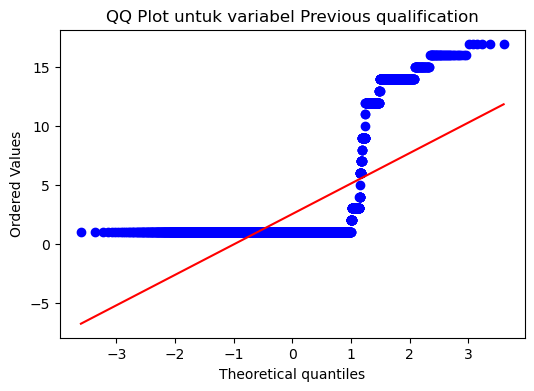

Shapiro-Wilk Test untuk variabel Mother's qualification: Statistics=0.8147290349006653, p-value=0.0


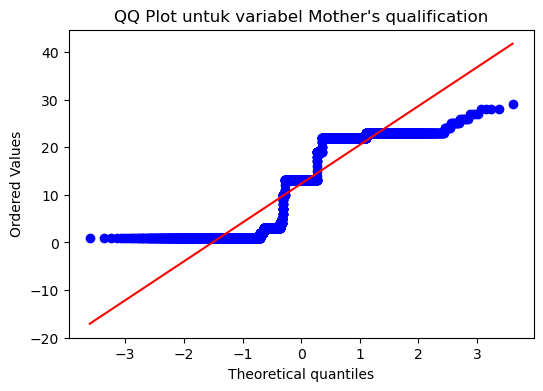

Shapiro-Wilk Test untuk variabel Father's qualification: Statistics=0.7960450053215027, p-value=0.0


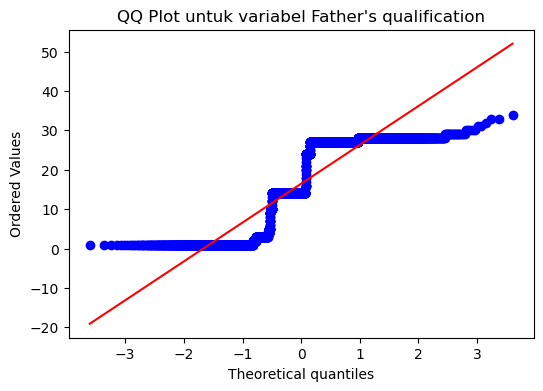

Shapiro-Wilk Test untuk variabel Application order: Statistics=0.6190690994262695, p-value=0.0


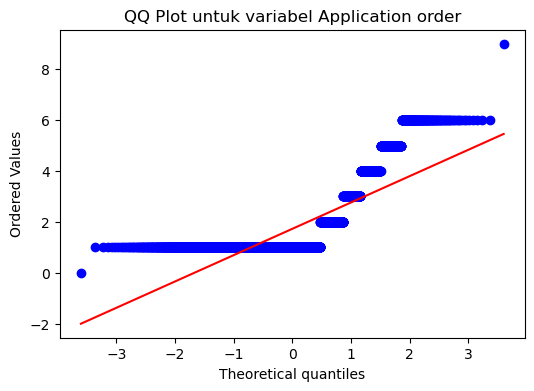

Shapiro-Wilk Test untuk variabel Curricular units 1st sem (enrolled): Statistics=0.7300187349319458, p-value=0.0


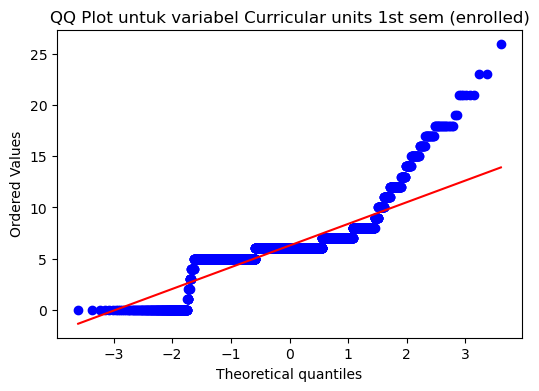

Shapiro-Wilk Test untuk variabel Curricular units 1st sem (approved): Statistics=0.8858110308647156, p-value=0.0


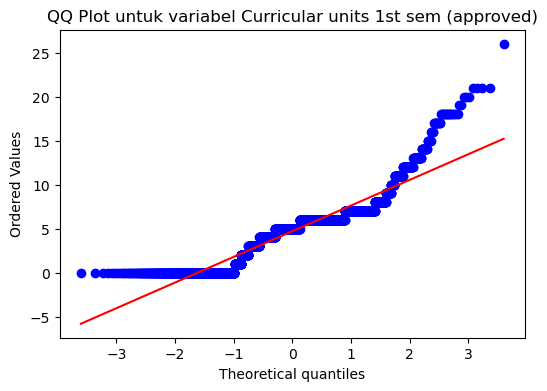

Shapiro-Wilk Test untuk variabel Curricular units 1st sem (evaluations): Statistics=0.9027658104896545, p-value=0.0


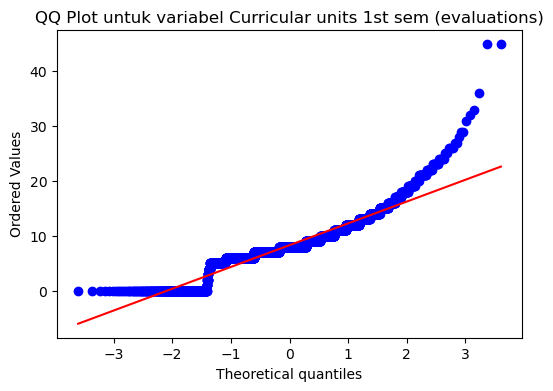

Shapiro-Wilk Test untuk variabel Curricular units 2nd sem (evaluations): Statistics=0.9323525428771973, p-value=7.224113973133729e-41


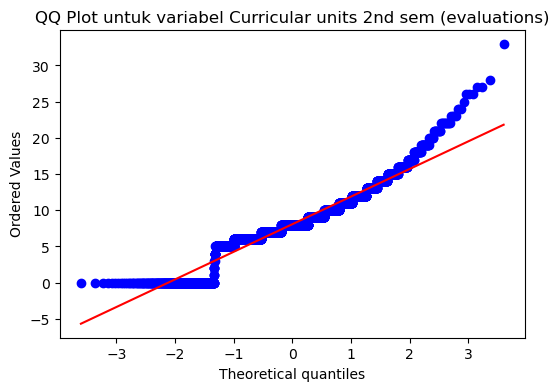

Shapiro-Wilk Test untuk variabel Curricular units 2nd sem (enrolled): Statistics=0.7854973077774048, p-value=0.0


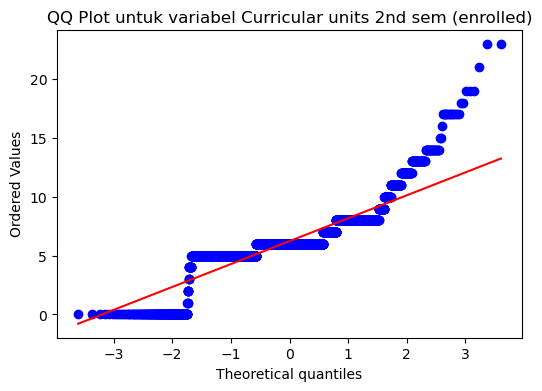

In [44]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Uji normalitas
for column in X_second_semester.columns:
    stat, p = stats.shapiro(X_second_semester[column])
    print(f"Shapiro-Wilk Test untuk variabel {column}: Statistics={stat}, p-value={p}")

    # QQ Plot
    plt.figure(figsize=(6, 4))
    stats.probplot(X_second_semester[column], dist="norm", plot=plt)
    plt.title(f"QQ Plot untuk variabel {column}")
    plt.show()

Dengan taraf signifikansi 5% dan data yang digunakan, belum cukup bukti untuk menyatakan bahwa error atau residual dari persamaan regresi yang dibentuk berdistribusi normal

###  Uji Heteroskedastis (Uji Glejser)

In [ ]:
# absolute residuals
abs_residuals = np.abs(residuals)

# meregresikan absolute residuals dengan variabel independen
model_abs_resid = sm.OLS(abs_residuals, X_sm).fit()

# summary model
model_abs_resid_summary = model_abs_resid.summary()
model_abs_resid_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     54.02
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          3.13e-103
Time:                        15:35:53   Log-Likelihood:                -9651.3
No. Observations:                4424   AIC:                         1.932e+04
Df Residuals:                    4413   BIC:                         1.939e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      2.5220      0.156     16.146      0.000       2.216       2.828
Age at enrollment                          0.0325      0.005      6.635      0.000       0.023       0.042
Previous qualification                    -0.0205      0.009     -2.400      0.016      -0.037      -0.004
Mother's qualification                    -0.0113      0.004     -2.622      0.009      -0.020      -0.003
Father's qualification                    -0.0039      0.003     -1.125      0.261      -0.011       0.003
Application order                         -0.0867      0.026     -3.335      0.001      -0.138      -0.036
Curricular units 1st sem (enrolled)        0.2696      0.047      5.684      0.000       0.177       0.363
Curricular units 1st sem (approved)       -0.1837      0.017    -10.660      0.000      -0.217      -0.150
Curricular units 1st sem (evaluations)     0.1348      0.014      9.411      0.000       0.107       0.163
Curricular units 2nd sem (evaluations)    -0.0224      0.014     -1.589      0.112      -0.050       0.005
Curricular units 2nd sem (enrolled)       -0.3568      0.047     -7.599      0.000      -0.449      -0.265
==============================================================================
Omnibus:                     1578.911   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5983.606
Skew:                           1.759   Prob(JB):                         0.00
Kurtosis:                       7.482   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Karena banyak variabel bebas yang masih signifikan terhadap absolut residual (p-value<0.05), maka keputusannya adalah tolak H_0


Dengan tingkat signifikansi 5% dan data yang digunakan, cukup bukti untuk menyatakan bahwa persamaan regresi memiliki varians error yang tidak konstan (masih terdapat heteroskedastis).

### Uji Autokorelasi (Durbin-Watson)

In [ ]:
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Curricular units 2nd sem (grade)   R-squared:                       0.596
Model:                                          OLS   Adj. R-squared:                  0.595
Method:                               Least Squares   F-statistic:                     649.7
Date:                              Thu, 11 Jan 2024   Prob (F-statistic):               0.00
Time:                                      15:35:50   Log-Likelihood:                -11578.
No. Observations:                              4424   AIC:                         2.318e+04
Df Residuals:                                  4413   BIC:                         2.325e+04
Df Model:                                        10                                         
Covariance Type:                          nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      6.7908      0.241     28.130      0.000       6.318       7.264
Age at enrollment                         -0.0440      0.008     -5.823      0.000      -0.059      -0.029
Previous qualification                  9.546e-05      0.013      0.007      0.994      -0.026       0.026
Mother's qualification                     0.0116      0.007      1.743      0.081      -0.001       0.025
Father's qualification                     0.0029      0.005      0.542      0.588      -0.008       0.013
Application order                          0.0048      0.040      0.119      0.905      -0.074       0.084
Curricular units 1st sem (enrolled)       -1.8151      0.073    -24.760      0.000      -1.959      -1.671
Curricular units 1st sem (approved)        1.5749      0.027     59.146      0.000       1.523       1.627
Curricular units 1st sem (evaluations)     0.1454      0.022      6.568      0.000       0.102       0.189
Curricular units 2nd sem (evaluations)     0.2137      0.022      9.817      0.000       0.171       0.256
Curricular units 2nd sem (enrolled)        0.8511      0.073     11.729      0.000       0.709       0.993
==============================================================================
Omnibus:                      445.012   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              794.877
Skew:                          -0.689   Prob(JB):                    2.48e-173
Kurtosis:                       4.553   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Karena pada nilai pada tabel Durbin Watson tidak ada untuk k=10,dan n=4424, maka akan melakukan pendekatan dengan asumsi ketika nilai Durbin Watson mendekati 2, maka asumsi non-autokorelasi terpenuhi

### Uji Multikolinearitas

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vifs = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]

vif_df = pd.DataFrame(list(zip(X_second_semester.columns, vifs)), columns=['Variabel', 'VIF'])

print(vif_df)

                                 Variabel        VIF
0                       Age at enrollment  23.422165
1                  Previous qualification   1.322131
2                  Mother's qualification   1.105018
3                  Father's qualification   1.450593
4                       Application order   1.385289
5     Curricular units 1st sem (enrolled)   1.120478
6     Curricular units 1st sem (approved)  13.282832
7  Curricular units 1st sem (evaluations)   2.727530
8  Curricular units 2nd sem (evaluations)   3.437935
9     Curricular units 2nd sem (enrolled)   2.968811


Terlihat pada variabel X_1,dan X_7 memiliki nilai VIF > 10, maka dengan ini persamaan regresi masih memiliki multikolinearitas.